In [624]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/data/run_data.csv")

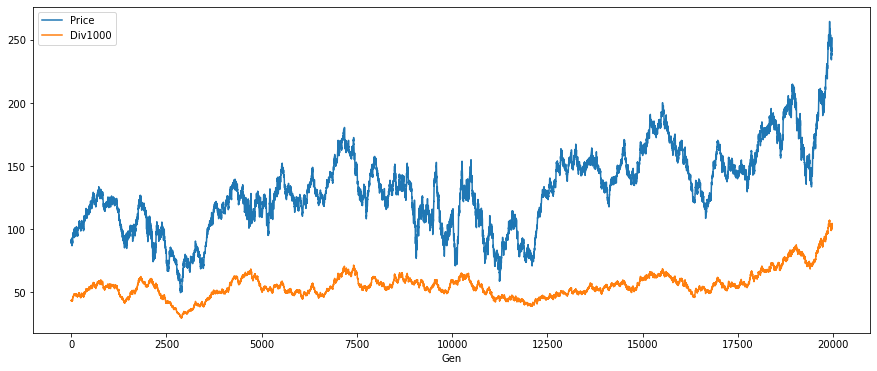

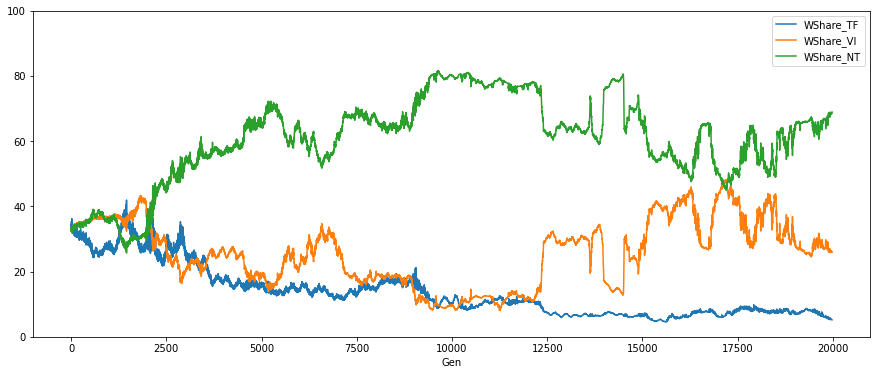

In [625]:
# df.plot(x="Gen", y = ["Price"],
#         kind="line", figsize=(15, 6))
# plt.show()

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
0.4209038796182534 0.17804738836106832 0.04450142141783386
Annual mean returns  
[0.07933585113326229, 0.052182593710531626, 0.0034990989934708984]
Annual std returns
[0.1884892370324964, 0.2930826123925434, 0.07862892649241629]


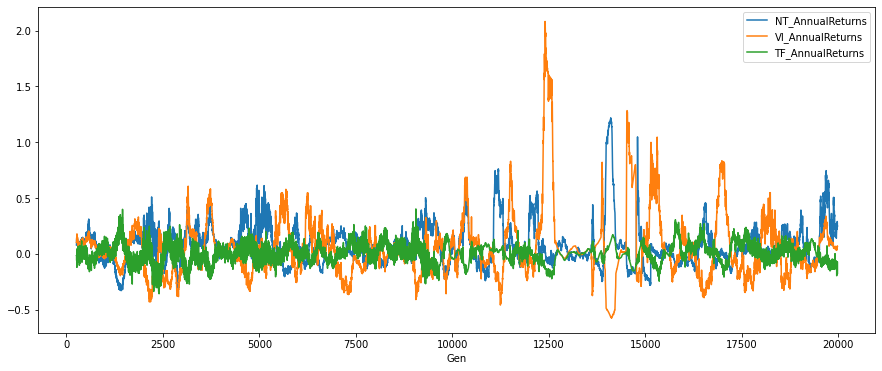

In [626]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()



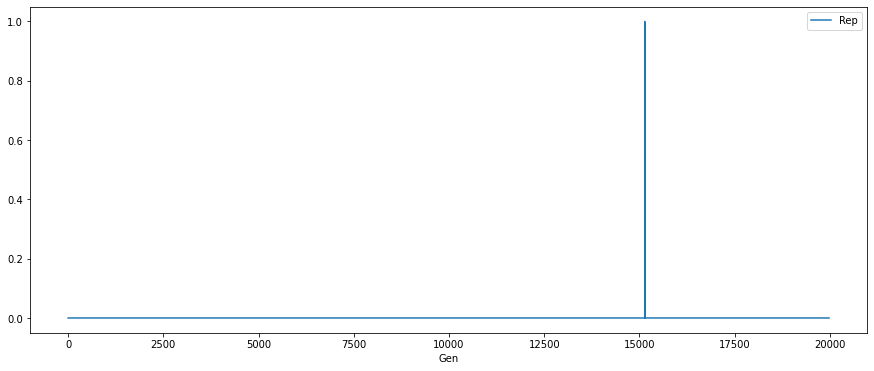

In [627]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

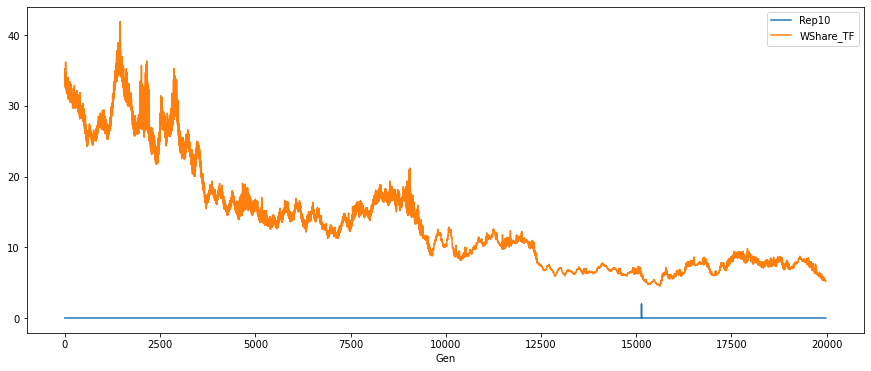

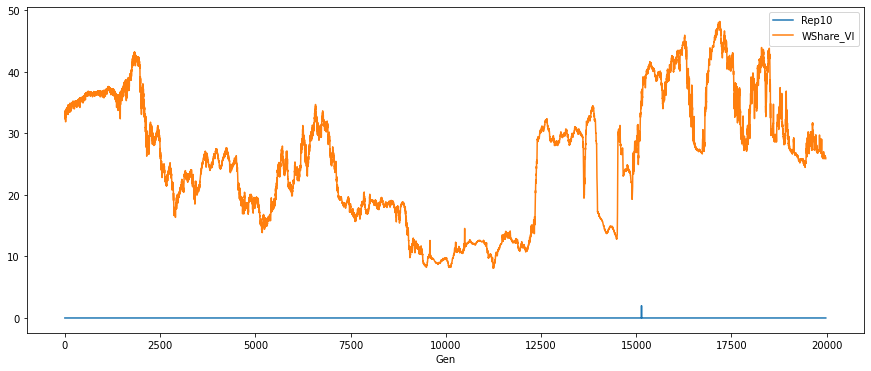

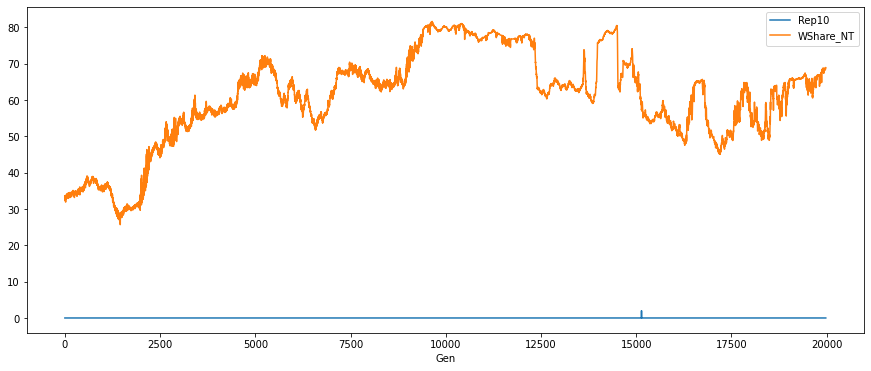

In [628]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [629]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

In [630]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

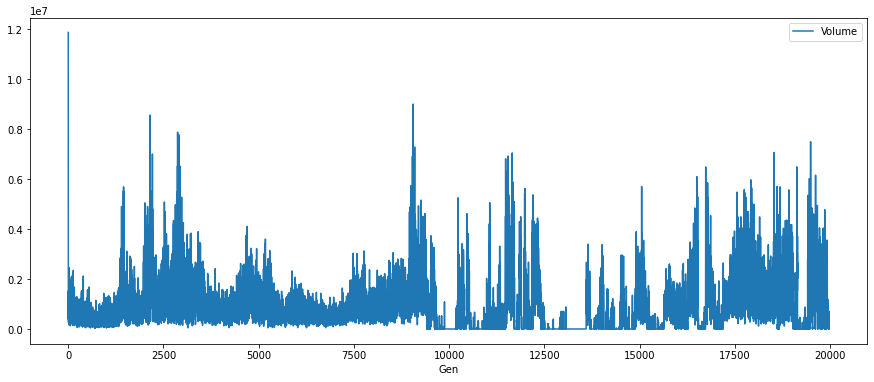

0        1.187392e+07
1        2.055352e+06
2        1.286413e+06
3        3.922175e+05
4        1.505747e+06
             ...     
19974    0.000000e+00
19975    0.000000e+00
19976    3.215295e+05
19977    0.000000e+00
19978    3.874748e+05
Name: Volume, Length: 19979, dtype: float64


In [631]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

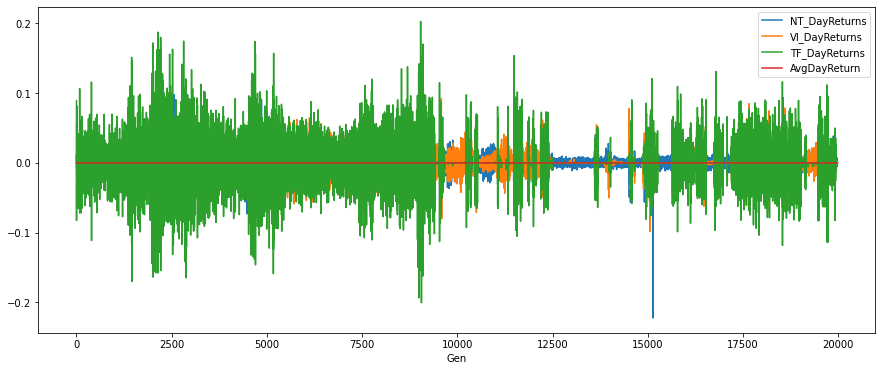

In [632]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

-1.9150777587417094e-17
96.8182317827455


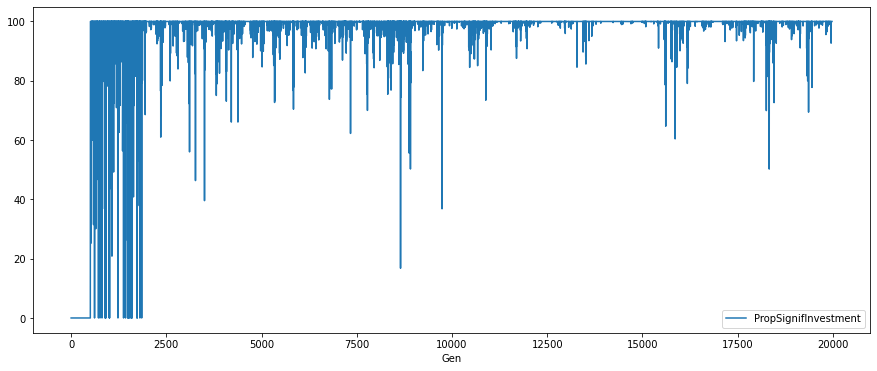

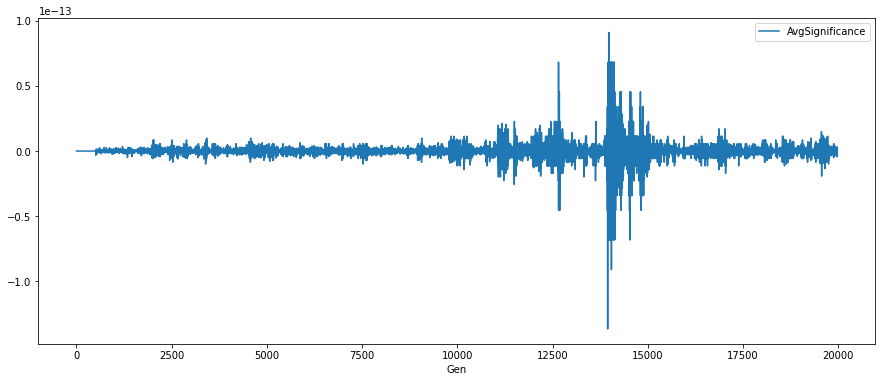

In [633]:
print(df['AvgSignificance'].mean())
print(df['PropSignifInvestment'].mean())
df.plot(x="Gen", y = ["PropSignifInvestment"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y = ["AvgSignificance"],
        kind="line", figsize=(15, 6))
plt.show()

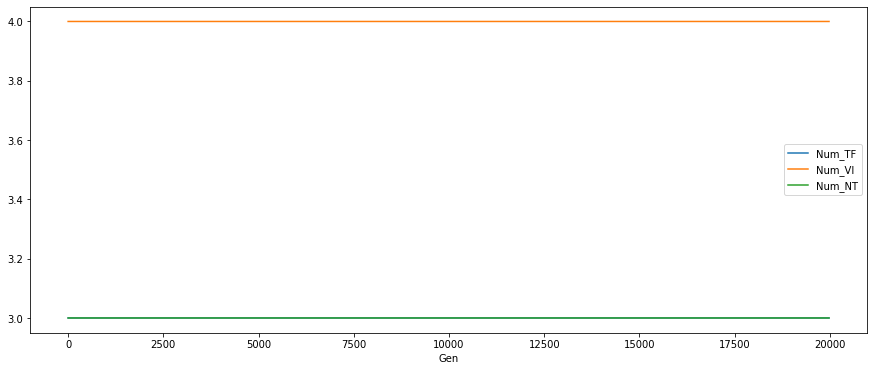

In [634]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


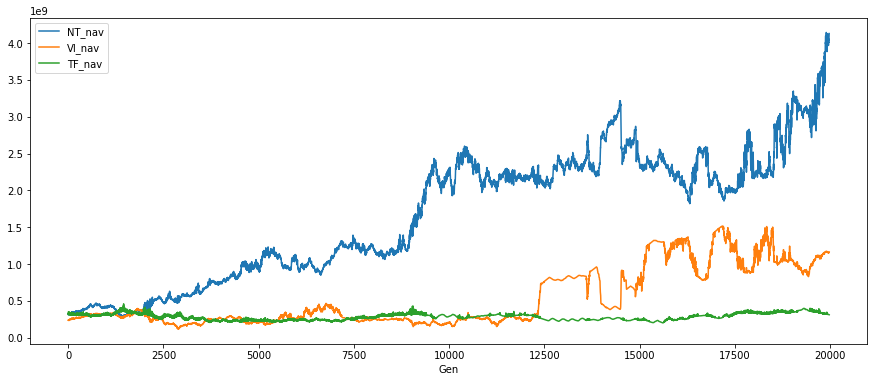

In [635]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


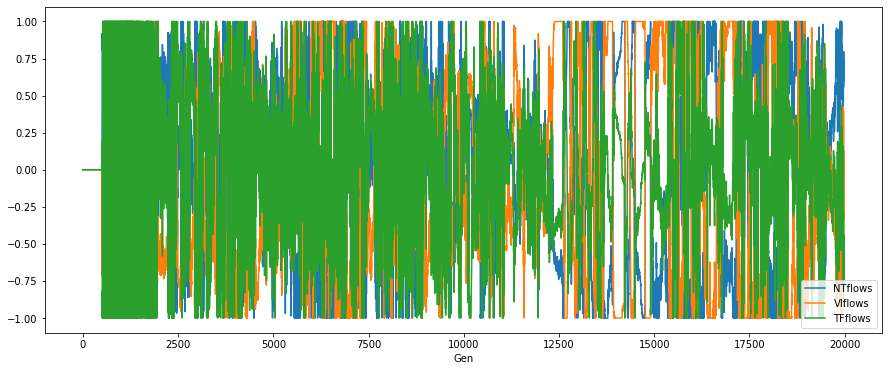

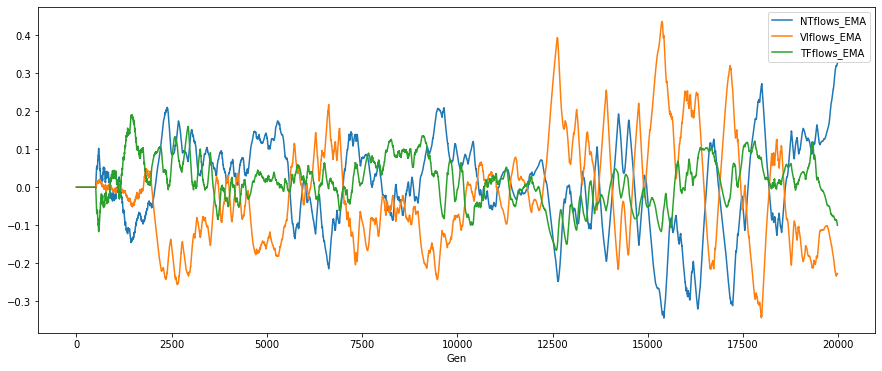

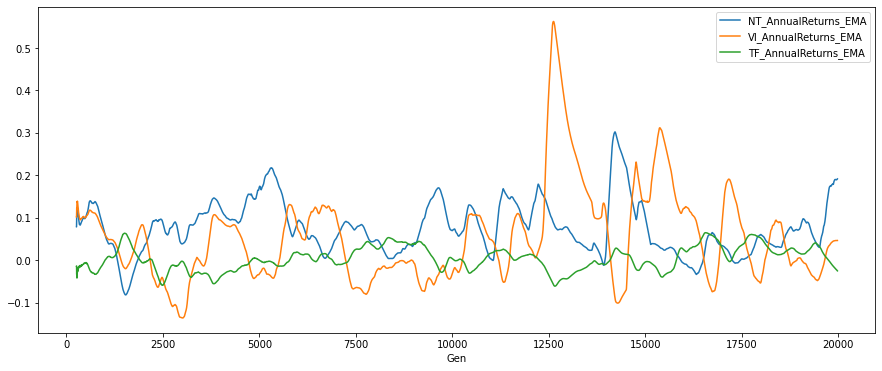

In [636]:
df.plot(x="Gen", y = ["NTflows", "VIflows", "TFflows"],
        kind="line", figsize=(15, 6))
plt.show()

span = 252*5

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'], span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'], span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'], span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['NT_AnnualReturns_EMA'] = pd.Series.ewm(df['NT_AnnualReturns'], span=span).mean()
df['VI_AnnualReturns_EMA'] = pd.Series.ewm(df['VI_AnnualReturns'], span=span).mean()
df['TF_AnnualReturns_EMA'] = pd.Series.ewm(df['TF_AnnualReturns'], span=span).mean()

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA"],
        kind="line", figsize=(15, 6))
plt.show()



In [637]:
data = pd.DataFrame()
data['NT_AnnualReturns_EMA'] = df['NT_AnnualReturns_EMA']
data['VI_AnnualReturns_EMA'] = df['VI_AnnualReturns_EMA']
data['TF_AnnualReturns_EMA'] = df['TF_AnnualReturns_EMA']
data['NTflows_EMA'] = df['NTflows_EMA']
data['VIflows_EMA'] = df['VIflows_EMA']
data['TFflows_EMA'] = df['TFflows_EMA']
print(data.corr())

# data = pd.DataFrame()
data['NTflows'] = df['NTflows']
data['VIflows'] = df['VIflows']
data['TFflows'] = df['TFflows']
data['NT_AnnualReturns'] = df['NT_AnnualReturns']
data['VI_AnnualReturns'] = df['VI_AnnualReturns']
data['TF_AnnualReturns'] = df['TF_AnnualReturns']
data.corr()

''' Chances of moving in the same direction '''
Total = len(data['NTflows'])


def getjoint(x, y):
    N = len(x)
    serie = []
    for i in range(N):
        if x.loc[i] > 0 and y.loc[i] > 0:
            serie.append(1)
        if x.loc[i] < 0 and y.loc[i] < 0:
            serie.append(-1)
    return serie

ChanceNTVI = 100 * len(getjoint(data['NTflows_EMA'], data['VIflows_EMA'])) / Total
print(ChanceNTVI)

ChanceTFVI = 100 * len(getjoint(data['TFflows_EMA'], data['VIflows_EMA'])) / Total
print(ChanceTFVI)

ChanceNTTF = 100 * len(getjoint(data['NTflows_EMA'], data['TFflows_EMA'])) / Total
print(ChanceNTTF)




                      NT_AnnualReturns_EMA  VI_AnnualReturns_EMA  \
NT_AnnualReturns_EMA              1.000000             -0.180441   
VI_AnnualReturns_EMA             -0.180441              1.000000   
TF_AnnualReturns_EMA             -0.360861             -0.493582   
NTflows_EMA                       0.571350             -0.631511   
VIflows_EMA                      -0.334630              0.816664   
TFflows_EMA                      -0.343200             -0.629723   

                      TF_AnnualReturns_EMA  NTflows_EMA  VIflows_EMA  \
NT_AnnualReturns_EMA             -0.360861     0.571350    -0.334630   
VI_AnnualReturns_EMA             -0.493582    -0.631511     0.816664   
TF_AnnualReturns_EMA              1.000000     0.006565    -0.285429   
NTflows_EMA                       0.006565     1.000000    -0.897771   
VIflows_EMA                      -0.285429    -0.897771     1.000000   
TFflows_EMA                       0.631993     0.104380    -0.531765   

                  

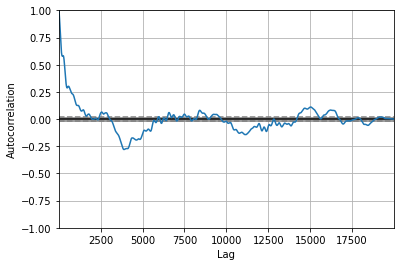

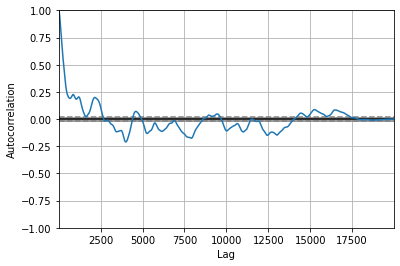

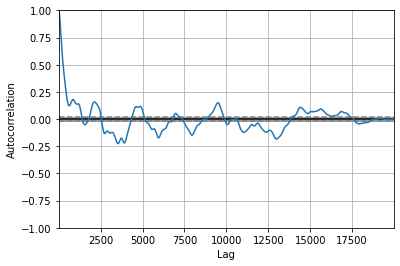

In [638]:
''' there is periodicity in flows EMA '''

x = pd.plotting.autocorrelation_plot(data['TFflows_EMA'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(data['VIflows_EMA'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(data['NTflows_EMA'])
x.plot()
plt.show()



In [639]:
from scipy.signal import periodogram


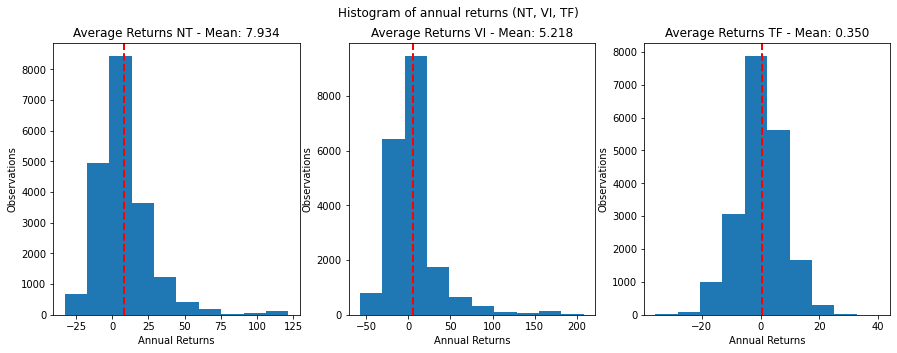

In [640]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [641]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.3402059162521061
